In [56]:
import numpy as np
import math
from matplotlib import pyplot as plt
import copy

Using Python to Showcase Gradient Descent Algorithm

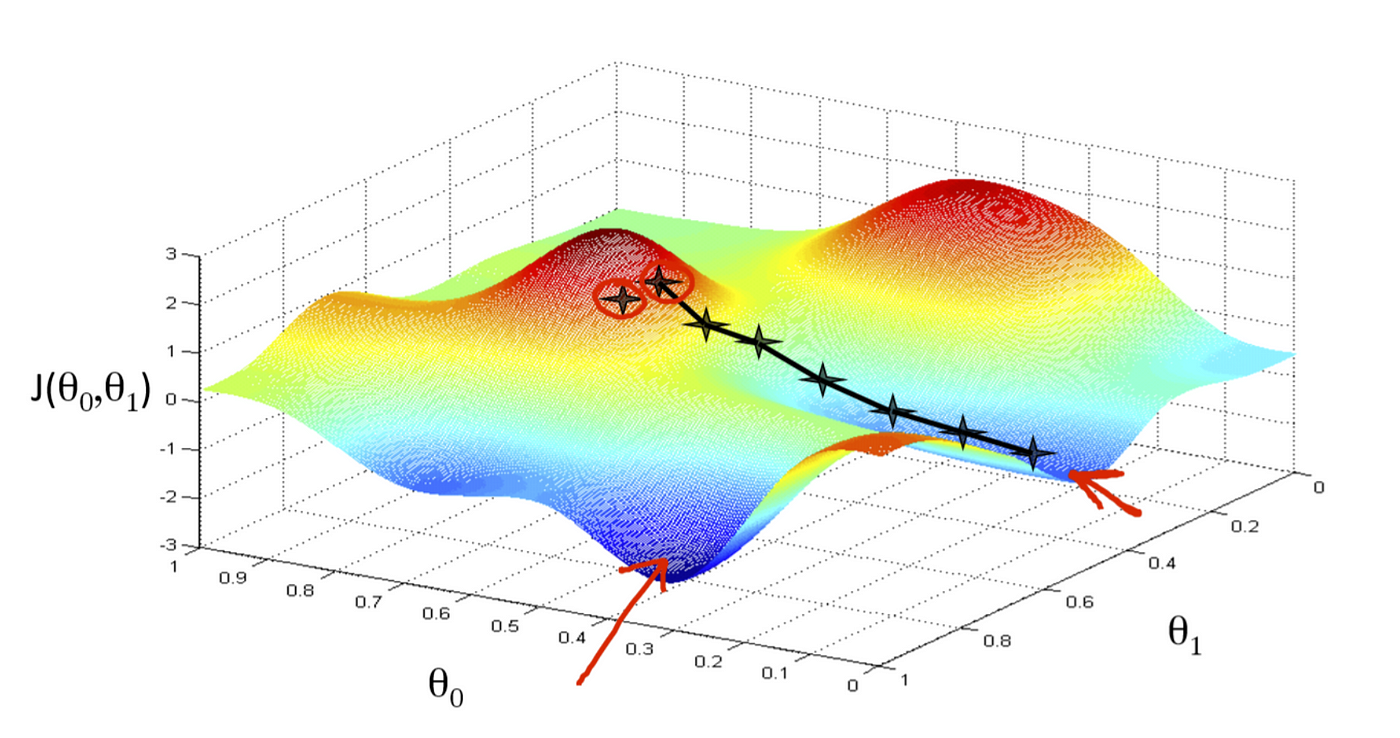

In [57]:
#Creating Cost Function

def Calc_Cost(x,y,m,b):
    m= x.shape[0]
    cost=0
    
    for i in range(m):
        f_mb= m*x[i]+b
        cost= cost+(f_mb-y[i])**2
    total_cost= (1/2*m)*cost
    
    return total_cost

#We have to Minimise the Cost Function and find the best values for m and b.

def Calc_Gradient(x,y,m,b):
    m= x.shape[0]
    
    dj_dm= 0
    dj_db= 0
    
    for i in range(m):
        f_wb= m*x[i]+b
        dj_dm= (m*x[i]+b-y[i])*x[i]
        dj_db= (m*x[i]+b-y[i])
        dj_dm+= dj_dm
        dj_db+=dj_db
    dj_dm= dj_dm/m
    dj_db= dj_db/m
    
    return dj_dm,dj_db

def gradient_descent(x, y, m_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    
    m = copy.deepcopy(m_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    m = m_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dm, dj_db = gradient_function(x, y, m , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        m = m - alpha * dj_dm                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, m , b))
            p_history.append([m,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dm: {dj_dm: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"m: {m: 0.3e}, b:{b: 0.5e}")
 
    return m, b, J_history, p_history #return w and J,w history for graphing



In [58]:
x_train = np.array([1.0, 2.0])  
y_train = np.array([300.0, 500.0])


# initializing
m_init = 0
b_init = 0
# Gradient Descent Settings

iterations = 10000

#Very Small Alpha as needed
tmp_alpha = 1.0e-2 

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, m_init, b_init, tmp_alpha, 
                                                    iterations, Calc_Cost, Calc_Gradient)
print(f"(w,b) = ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 3.27e+05  dj_dm: -9.920e+02, dj_db: -4.960e+02   m:  9.920e+00, b: 4.96000e+00
Iteration 1000: Cost 3.92e+04  dj_dm: -4.283e-02, dj_db: -2.141e-02   m:  9.920e+02, b: 4.95979e+02
Iteration 2000: Cost 3.92e+04  dj_dm: -1.849e-06, dj_db: -9.244e-07   m:  9.920e+02, b: 4.96000e+02
Iteration 3000: Cost 3.92e+04  dj_dm: -8.004e-11, dj_db: -4.002e-11   m:  9.920e+02, b: 4.96000e+02
Iteration 4000: Cost 3.92e+04  dj_dm: -5.684e-12, dj_db: -2.842e-12   m:  9.920e+02, b: 4.96000e+02
Iteration 5000: Cost 3.92e+04  dj_dm: -5.684e-12, dj_db: -2.842e-12   m:  9.920e+02, b: 4.96000e+02
Iteration 6000: Cost 3.92e+04  dj_dm: -5.684e-12, dj_db: -2.842e-12   m:  9.920e+02, b: 4.96000e+02
Iteration 7000: Cost 3.92e+04  dj_dm: -5.684e-12, dj_db: -2.842e-12   m:  9.920e+02, b: 4.96000e+02
Iteration 8000: Cost 3.92e+04  dj_dm: -5.684e-12, dj_db: -2.842e-12   m:  9.920e+02, b: 4.96000e+02
Iteration 9000: Cost 3.92e+04  dj_dm: -5.684e-12, dj_db: -2.842e-12   m:  9.920e+02, b: 4.96000e+02
